In [6]:
import sys, os, json

In [7]:
sys.path.append(r'C:\Users\Shubham Yadav\Desktop\Minor Project')


In [8]:
import pandas as pd
from sklearn import preprocessing
import nltk
nltk.download('opinion_lexicon')

[nltk_data] Downloading package opinion_lexicon to C:\Users\Shubham
[nltk_data]     Yadav\AppData\Roaming\nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


True

In [9]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

df = pd.read_csv('balanced_dataset.csv')


In [10]:
df = df.rename(columns={'Review': 'text'})


In [11]:
print(df.columns)



Index(['Rate', 'text', 'Summary', 'sentiment'], dtype='object')


In [12]:
df.drop(columns=[
    'Summary'],
        inplace=True)
df.sample(20)

,Rate,text,sentiment
23958,5.0,Terrific purchase,1
15623,5.0,Awesome,1
47292,3.0,Nan,0
59267,2.0,Moderate,0
29449,4.0,Value-for-money,1
25303,5.0,Super!,1
14391,5.0,Super!,1
51736,2.0,Not good,0
46283,1.0,Waste of money!,0
17084,5.0,Super!,1


In [13]:
df = df.rename(columns={'Review': 'text'})

In [14]:
import pandas as pd
import re

# Example text cleaning function
def clean(text):
    if not isinstance(text, str):  # Check if the input is not a string
        return ''  # Return an empty string for non-string values
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove special characters
    text = text.lower().strip()  # Convert to lowercase and strip spaces
    return text



# Check columns
print("Columns in the dataset:", df.columns)

# If 'text' column exists, proceed with cleaning
if 'text' in df.columns:
    df['text_orig'] = df['text'].copy()
    df['text'] = df['text'].apply(clean)
    print(df.head())  # Display the first few rows of the DataFrame
else:
    print("Column 'text' not found in the dataset.")


Columns in the dataset: Index(['Rate', 'text', 'sentiment'], dtype='object')
   Rate               text  sentiment          text_orig
0   5.0          excellent          1          Excellent
1   5.0           fabulous          1          Fabulous!
2   4.0        really nice          1        Really Nice
3   5.0  worth every penny          1  Worth every penny
4   5.0     classy product          1     Classy product


In [15]:
# This can take longer to run due to the size of the dataset!
import textacy
import spacy
from spacy.lang.en import STOP_WORDS as stop_words
nlp = spacy.load('en_core_web_lg')

def extract_lemmas(doc, **kwargs):
    return [t.lemma_ for t in textacy.extract.words(doc,
                                                    filter_stops = False,
                                                    filter_punct = True,
                                                    filter_nums = True,
                                                    include_pos = ['ADJ', 'NOUN', 'VERB', 'ADV'],
                                                    exclude_pos = None,
                                                    min_freq = 1)]

def clean_text(text):
    doc = nlp(text)
    lemmas = extract_lemmas(doc)
    return ' '.join(lemmas)

In [16]:
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [17]:
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Shubham Yadav\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [18]:
def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

In [19]:
import nltk
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')

# Define the clean_text function
def clean_text(text):
    # Your text cleaning process here
    # Example: Split text into words
    text = text.split()
    # Remove digits
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # Remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # Remove empty tokens
    text = [x for x in text if x.strip()]
    return " ".join(text)

# Apply clean_text to the DataFrame
df["text"] = df["text"].apply(clean_text)

# Remove empty observations after cleaning
df = df[df['text'].str.len() != 0]


[nltk_data] Downloading package stopwords to C:\Users\Shubham
[nltk_data]     Yadav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df['text'],
                                                    df['sentiment'],
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=df['sentiment'])

print ('Size of Training Data ', X_train.shape[0])
print ('Size of Test Data ', X_test.shape[0])

print ('Distribution of classes in Training Data :')
print ('Positive Sentiment ', str(sum(Y_train == 1)/ len(Y_train) * 100.0))
print ('Negative Sentiment ', str(sum(Y_train == 0)/ len(Y_train) * 100.0))

print ('Distribution of classes in Testing Data :')
print ('Positive Sentiment ', str(sum(Y_test == 1)/ len(Y_test) * 100.0))
print ('Negative Sentiment ', str(sum(Y_test == 0)/ len(Y_test) * 100.0))

Size of Training Data  48715
Size of Test Data  12179
Distribution of classes in Training Data :
Positive Sentiment  50.00102637791235
Negative Sentiment  49.99897362208765
Distribution of classes in Testing Data :
Positive Sentiment  49.99589457262501
Negative Sentiment  50.00410542737499


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(min_df = 10, ngram_range=(1,1))
X_train_tf = tfidf.fit_transform(X_train)
X_test_tf = tfidf.transform(X_test)

In [22]:
import numpy as np

from sklearn.datasets import make_classification
from sklearn.svm import LinearSVC
from sklearn.metrics import brier_score_loss
from sklearn.model_selection import train_test_split
from sklearn.calibration import CalibratedClassifierCV,calibration_curve
from sklearn import metrics

import matplotlib.pyplot as plt

In [23]:
np.random.seed(42)

In [24]:
X, y = make_classification(n_samples=9000,n_features=20,class_sep=0.5)

In [25]:
clf = LinearSVC(random_state=42, tol=1e-5)
clf.fit(X_train_tf,Y_train)

LinearSVC(random_state=42, tol=1e-05)

<Figure size 640x480 with 0 Axes>

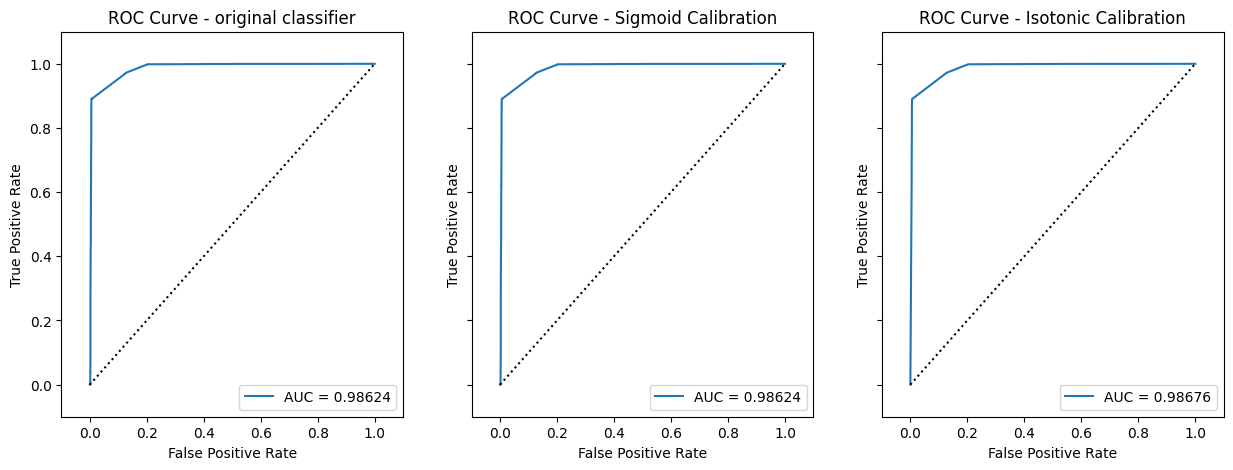

In [26]:
plt.clf()

fig,axes = plt.subplots(1,3,sharey=True)

Y_preds = clf.decision_function(X_test_tf)

clf_preds = Y_preds.reshape(-1,1)

fpr, tpr, _ = metrics.roc_curve(Y_test, clf_preds)

auc_score = metrics.auc(fpr, tpr)

axes[0].set_title('ROC Curve - original classifier')
axes[0].plot(fpr, tpr, label='AUC = {:.5f}'.format(auc_score))

axes[0].plot([0,1],[0,1],'k:')

axes[0].set_xlim([-0.1,1.1])
axes[0].set_ylim([-0.1,1.1])
axes[0].set_ylabel('True Positive Rate')
axes[0].set_xlabel('False Positive Rate')

axes[0].legend(loc='lower right')


## CCV sigmoid

ccv_sig = CalibratedClassifierCV(clf,method='sigmoid',cv='prefit')
ccv_sig.fit(X_train_tf,Y_train)

Y_preds = ccv_sig.predict_proba(X_test_tf)

ccv_preds_sig = Y_preds[:,1]

fpr, tpr, _ = metrics.roc_curve(Y_test, ccv_preds_sig)

auc_score = metrics.auc(fpr, tpr)

axes[1].set_title('ROC Curve - Sigmoid Calibration')
axes[1].plot(fpr, tpr, label='AUC = {:.5f}'.format(auc_score))

axes[1].plot([0,1],[0,1],'k:')

axes[1].set_xlim([-0.1,1.1])
axes[1].set_ylim([-0.1,1.1])
axes[1].set_ylabel('True Positive Rate')
axes[1].set_xlabel('False Positive Rate')

axes[1].legend(loc='lower right')


## CCV isotonic

ccv_iso = CalibratedClassifierCV(clf,method='isotonic',cv='prefit')
ccv_iso.fit(X_train_tf,Y_train)

Y_preds = ccv_iso.predict_proba(X_test_tf)

ccv_preds_iso = Y_preds[:,1]

fpr, tpr, _ = metrics.roc_curve(Y_test, ccv_preds_iso)

auc_score = metrics.auc(fpr, tpr)

axes[2].set_title('ROC Curve - Isotonic Calibration')
axes[2].plot(fpr, tpr, label='AUC = {:.5f}'.format(auc_score))

axes[2].plot([0,1],[0,1],'k:')

axes[2].set_xlim([-0.1,1.1])
axes[2].set_ylim([-0.1,1.1])
axes[2].set_ylabel('True Positive Rate')
axes[2].set_xlabel('False Positive Rate')

axes[2].legend(loc='lower right')


plt.gcf().set_size_inches(15,5)
plt.show()

In [27]:
clf_preds

array([[ 0.98526803],
       [-0.9952949 ],
       [-0.99668619],
       ...,
       [-0.21557382],
       [-0.99990787],
       [ 0.9969843 ]])

In [28]:
clf_preds.max()

np.float64(2.268363362636391)

In [29]:
clf_preds.min()

np.float64(-2.4431352164996327)

In [30]:
clf_preds_normalized = (clf_preds+(clf_preds.min()*-1))
clf_preds_normalized = clf_preds_normalized/clf_preds_normalized.max()

In [31]:
clf_preds_normalized.max()

np.float64(1.0)

<Figure size 640x480 with 0 Axes>

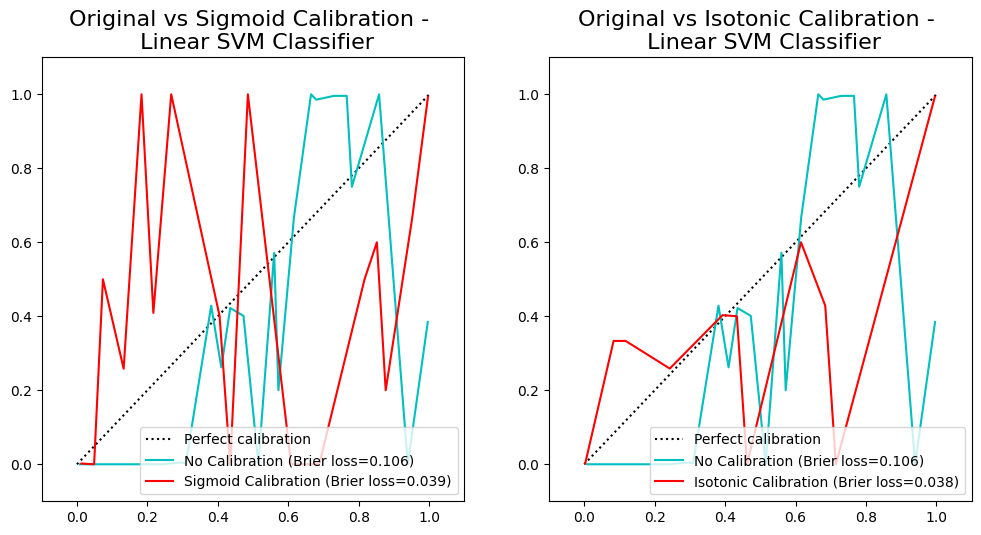

In [32]:
plt.clf()

fig, axes = plt.subplots(1,2)

ax=axes[0]

ax.set_xlim([-0.1,1.1])
ax.set_ylim([-0.1,1.1])

ax.plot([0, 1], [0, 1], "k:", label="Perfect calibration")

clf_score = brier_score_loss(Y_test, clf_preds_normalized, pos_label=1)
fraction_of_positives, mean_predicted_value = calibration_curve(Y_test, clf_preds_normalized, n_bins=30)
ax.plot(mean_predicted_value, fraction_of_positives, "c-", label="No Calibration (Brier loss={:.3f})".format(clf_score))

clf_score = brier_score_loss(Y_test, ccv_preds_sig, pos_label=1)
fraction_of_positives, mean_predicted_value = calibration_curve(Y_test, ccv_preds_sig, n_bins=30)
ax.plot(mean_predicted_value, fraction_of_positives, "r-", label="Sigmoid Calibration (Brier loss={:.3f})".format(clf_score))

ax.legend(loc='lower right')
ax.set_title('Original vs Sigmoid Calibration - \n Linear SVM Classifier', size=16)
plt.subplots_adjust(top=0.85)


## ax 2

ax=axes[1]

ax.set_xlim([-0.1,1.1])
ax.set_ylim([-0.1,1.1])

ax.plot([0, 1], [0, 1], "k:", label="Perfect calibration")

clf_score = brier_score_loss(Y_test, clf_preds_normalized, pos_label=1)
fraction_of_positives, mean_predicted_value = calibration_curve(Y_test, clf_preds_normalized, n_bins=30)
ax.plot(mean_predicted_value, fraction_of_positives, "c-", label="No Calibration (Brier loss={:.3f})".format(clf_score))

clf_score = brier_score_loss(Y_test, ccv_preds_iso, pos_label=1)
fraction_of_positives, mean_predicted_value = calibration_curve(Y_test, ccv_preds_iso, n_bins=30)
ax.plot(mean_predicted_value, fraction_of_positives, "r-", label="Isotonic Calibration (Brier loss={:.3f})".format(clf_score))

ax.legend(loc='lower right')
ax.set_title('Original vs Isotonic Calibration - \n Linear SVM Classifier', size=16)
plt.subplots_adjust(top=0.85)

plt.gcf().set_size_inches(12,6)
plt.show()

In [33]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

Y_preds = clf.predict(X_test_tf)
print ('Accuracy Score - ', accuracy_score(Y_test, Y_preds))
print ('ROC-AUC Score - ', roc_auc_score(Y_test, Y_preds))

Accuracy Score -  0.9418671483701453
ROC-AUC Score -  0.9418629815374084


In [34]:
sample_reviews = df.sample(15, random_state=22)
sample_reviews_tf = tfidf.transform(sample_reviews['text'])
sentiment_predictions = clf.predict(sample_reviews_tf)
sentiment_predictions = pd.DataFrame(data = sentiment_predictions,
                                     index=sample_reviews.index,
                                     columns=['sentiment_prediction'])
sample_reviews = pd.concat([sample_reviews, sentiment_predictions], axis=1)
print ('Some sample reviews with their sentiment - ')
sample_reviews[['text_orig','sentiment_prediction']]

Some sample reviews with their sentiment - 


,text_orig,sentiment_prediction
29565,Wonderful,1
7616,Nan,0
22008,Terrific,1
38365,Decent product,0
10358,Pretty good,1
11744,Excellent,1
8284,Best in the market!,1
58062,Utterly Disappointed,0
33751,Useless product,0
10059,Super!,1


In [42]:
import nltk
nltk.download('opinion_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package opinion_lexicon to C:\Users\Shubham
[nltk_data]     Yadav\AppData\Roaming\nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Shubham
[nltk_data]     Yadav\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [43]:
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize

print('Total number of words in opinion lexicon', len(opinion_lexicon.words()))
print('Examples of positive words in opinion lexicon',
      opinion_lexicon.positive()[:5])
print('Examples of negative words in opinion lexicon',
      opinion_lexicon.negative()[:5])

Total number of words in opinion lexicon 6789
Examples of positive words in opinion lexicon ['a+', 'abound', 'abounds', 'abundance', 'abundant']
Examples of negative words in opinion lexicon ['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable']


In [55]:

from nltk.tokenize import TreebankWordTokenizer
# Example of how to use the opinion lexicon for sentiment scoring
def bing_liu_score(text):
    # Tokenize the text into words
    words = word_tokenize(text.lower())  # Convert to lowercase to match lexicon

    # Load positive and negative words from the opinion lexicon
    positive_words = set(opinion_lexicon.positive())
    negative_words = set(opinion_lexicon.negative())

    # Count positive and negative words in the text
    pos_count = sum(1 for word in words if word in positive_words)
    neg_count = sum(1 for word in words if word in negative_words)

    # Return a score: positive if positive words outweigh negative words
    if pos_count > neg_count:
        return 1  # Positive sentiment
    elif pos_count < neg_count:
        return -1  # Negative sentiment
    else:
        return 0  # Neutral sentiment




In [56]:
def baseline_scorer(text):
    score = bing_liu_score(text)
    if score > 0:
        return 1
    else:
        return 0

In [57]:
# Debugging step
try:
    print(X_test.head())  # Check X_test is defined
except NameError:
    print("X_test is not defined!")

try:
    print(baseline_scorer)  # Check baseline_scorer is defined
except NameError:
    print("baseline_scorer is not defined!")


14510              valueformoney
46464      worst experience ever
59901                recommended
14629                    awesome
56388    expected better product
Name: text, dtype: object
<function baseline_scorer at 0x000002657A709A80>


In [58]:
pip install --upgrade nltk
